# Исследование для интернет-магазина «Стримчик»

Цель: выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год.

Перед нами данные до 2016 года. В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Краткое описание данных: перед нами данные 2016 года. Структура датафрейма: 

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [128]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats as st

In [129]:
data=pd.read_csv('/datasets/games.csv')

## Подготовка данных

Посмотрим на датафрейм, а так же на информацию по нему. 

In [130]:
display(data.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [131]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

In [132]:
display(data.describe())

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Мы посмотрели на датафрейм и его структуру. На информацию о том какие типы данных размещены в столбцах, есть ли там пропуски. И краткую информацию о данных представленных в цифрах. Далее нам необходимо сделать предварительную обработку данных.

### Приведение названий столбцов к единому регистру

Приведем все названия столбцов к нижнему регистру

In [133]:
data.columns=data.columns.str.lower()
display(data.head(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Преобразование данные в нужные типы

Посмотрим на типы даннах столбцов датафрейма, мы видим что столбец "user_score" собержит данные типа float. Для начала запросим уникальные данные этого столбца. Видим нетипичное обозначение "tbd" Предположим что tbd это to be determined -то есть оценки пока нет, но будет. Заменим эти значения на 0. А далее уже преобразуем столбец в тип данных float.

Столбец "year_of_release" собержит год релиза, а значит заменим тип данных на int. Но для этого сначала избавимся от пропусков. Так как заполнить пропуски не представляется возможным, а данные необходимы и важны для дальнейшего исследования, а пропуски составляют менее 5% от данных, то мы приняли решение удалить данные с пропусками.

In [134]:
display(data['user_score'].unique())
data.loc[data['user_score']=='tbd','user_score']=0
display(data['user_score'].unique())
data['user_score']=data['user_score'].astype(float)
data=data.dropna(subset=['year_of_release'])
data['year_of_release']=data['year_of_release'].astype(int)
display(data.info())

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 0, '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


None

### Обработка пропусков

Посмотрим на пропуски. У нас наблюдались пропуски в столбце в годом выпуска. Возможно что эти данные не заполнены по причине того что дата выхода игр была не известна, либо это ошибка при сборе данных. Восстановить такие пропуски не представлялось возможным, но эти данные были важны для дальнейшего исследования. Так как пропуском было менее 5% было принято решение избавиться от них. 

Пропуски в оценках критиков могли образоваться по той причине ячто для некоторых игр этих оценок просто нет. Таких пропусков значительное количество и просто так избавиться от данных мы не можем. но заметнить пропуски каким-то средним или медианой будет не корректно, так как это субъективно. Пока мы оставим пропуски и учтем это в дальнейшем.

Пропуски в оценках пользователей. Туп могла сложиться та же ситуация что и с оценкой критиков, для некоторых игр просто нет оуенки пользователей. Так же вспомним что здесь у нас было нетипичное значение tbd, мы предположили что это to be determined -то есть оценки пока нет, но будет. И заменили значения на 0. По сути это тоже пропуски. Поступим с пропусками аналогично пропускам в оценке критиков. Ос тавим их как есть и учтем это в дальнейшем.

Пропуски в рейтинге могли возникнуть по причине что рейтинг игре не присвоен. Данных много, они важны для дальнейшего исследования. Поэтому оставим пропуски и и учтем это в дальнейшем.

Обратим внимание на пропуски в столбцах названия игры и ее жанра. Таких пропусков всего 2, это количество совсем не значительно, заполнить эти пропуски не представляется возможным, а потому просто избавимся от этих данных.

In [135]:
data=data.dropna (subset=['name','genre'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Теперь проверим данные на явные дубликаты. Видим что явных дубликатов нет.

In [136]:
data.duplicated().sum()

0

Проверим не явные дубликаты. Логично будет проверить игры с одинаковым названием, но это могут быть одни и те же игры, но на разнеых платформах. тогда правильно будет проверить дубликаты по названию и платформе, но игра могла перезапускаться в разные года. Получается проверим дубликаты по названию игры, платформе и году выпуска. Нашелся один дубликат. Избавимся от него.

In [137]:
display(data.duplicated(subset=['name','platform','year_of_release']).sum())
display(data[data.duplicated(subset=['name','platform','year_of_release'])])
data=data.drop_duplicates(subset=['name','platform','year_of_release'])
display(data.duplicated(subset=['name','platform','year_of_release']).sum())

1

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


0

Для дальнейших исследования посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец 'sum'.

In [138]:
data['sum']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


##  Проведение исследовательского анализ данных

Посмотрим на количество выпускаемых игр в разные годы. Хорошо заметно что до 1994 года включительно игр выпускалось совсем не много, там почти нет информации о рейтинге, оценке критиков и оценке пользователей. Для дальнейшего исследования избавимся от этих данных.

In [139]:
display(data.groupby(['year_of_release']).count())
data=data[data['year_of_release'] > 1994]
display(data.groupby(['year_of_release']).count())

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum
year_of_release,,,,,,,,,,,
1980,9,9,9,9,9,9,9,0,0,0,9
1981,46,46,46,46,46,46,46,0,0,0,46
1982,36,36,36,36,36,36,36,0,0,0,36
1983,17,17,17,17,17,17,17,0,0,0,17
1984,14,14,14,14,14,14,14,0,0,0,14
1985,14,14,14,14,14,14,14,1,1,1,14
1986,21,21,21,21,21,21,21,0,0,0,21
1987,16,16,16,16,16,16,16,0,0,0,16
1988,15,15,15,15,15,15,15,1,1,1,15


,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum
year_of_release,,,,,,,,,,,
1995,219,219,219,219,219,219,219,0,0,0,219
1996,263,263,263,263,263,263,263,8,8,7,263
1997,289,289,289,289,289,289,289,17,19,19,289
1998,379,379,379,379,379,379,379,28,31,32,379
1999,338,338,338,338,338,338,338,39,39,42,338
2000,350,350,350,350,350,350,350,143,150,148,350
2001,482,482,482,482,482,482,482,326,339,339,482
2002,829,829,829,829,829,829,829,627,656,655,829
2003,775,775,775,775,775,775,775,585,611,613,775


Посмотрим какие платформы которые имели самые высокие суммарные продажи. Можно выделить следующие шесть платформ с результатами:

PS2	- 1233.56

X360 - 961.24

PS3 - 931.34

Wii - 891.18

DS - 802.76

PS - 721.55

In [140]:
data_1=data.pivot_table(index='platform',values='sum',aggfunc='sum')
data_1=data_1.reset_index(drop=False)
data_1.sort_values(by='sum',ascending=False)

,platform,sum
12,PS2,1233.56
23,X360,961.24
13,PS3,931.33
21,Wii,891.18
3,DS,802.76
11,PS,721.55
14,PS4,314.14
5,GBA,312.88
15,PSP,289.53
1,3DS,257.81


Построим график распределения суммарного дохода на 6 самых прибыльных платформах по годам. Можно заметить что средний жизненный цикл платформы 3-4 года.

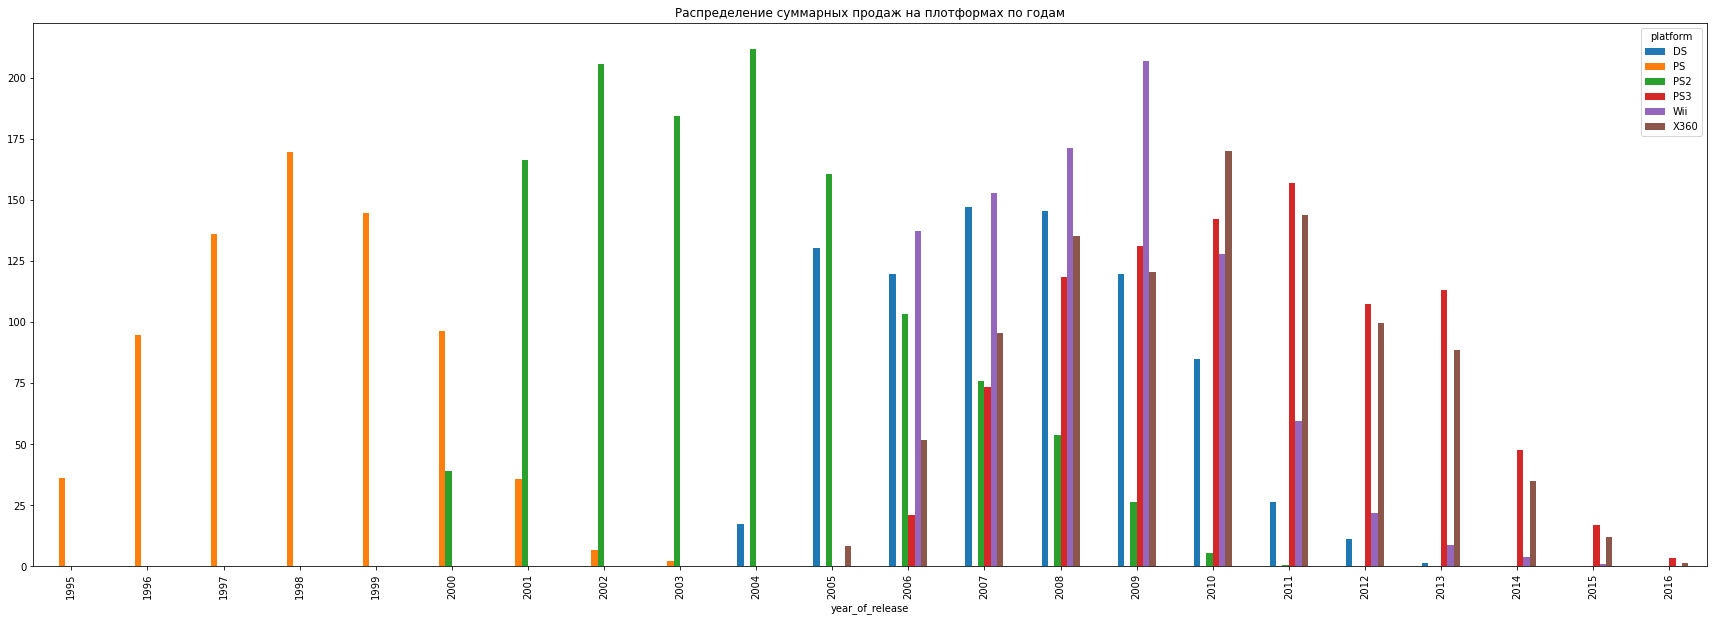

In [141]:
data_2=data[(data['platform']=='PS2') | (data['platform']=='PS') | (data['platform']=='X360') | (data['platform']=='PS3') | (data['platform']=='Wii') | (data['platform']=='DS') ]
data_2=data_2.pivot_table(index='year_of_release',columns='platform',values='sum',aggfunc='sum')
data_2.plot.bar(figsize=(30,10),title='Распределение суммарных продаж на плотформах по годам')
plt.show()

Так как мы выяснили что средний срок жизни платформы около 4  лет, то для нашего исследования достаточно будет взять данные начиная с 2013 года.

In [142]:
data_3=data[data['year_of_release']>=2013]
data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1300 non-null   float64
 10  rating           1256 non-null   object 
 11  sum              2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB


Посмотрим какие платформы были в эти годы и как они развивались или угасали.

В таблице видно что всего в эти годы было 11 платформ. Ряд из них перестали приносить доход к 2016 году. это такие платформы как : DC, PSP. Так же есть платформы находящиеся в конц своего жизненного цикла(затухание): PC, PS3, WiiU, X360. 

Среди потенциально прибульных платформ можно выделить: PS4 и XOne. Эти платформы находятся в середине своего жизненного цикла и пока приносят неплохие суммарные доходы.

year_of_release,2013,2014,2015,2016
platform,,,,
3DS,56.57,43.76,27.78,15.14
DS,1.54,NaN,NaN,NaN
PC,12.38,13.28,8.52,5.25
PS3,113.25,47.76,16.82,3.60
PS4,25.99,100.00,118.90,69.25
PSP,3.14,0.24,0.12,NaN
PSV,10.59,11.90,6.25,4.25
Wii,8.59,3.75,1.14,0.18
WiiU,21.65,22.03,16.35,4.60


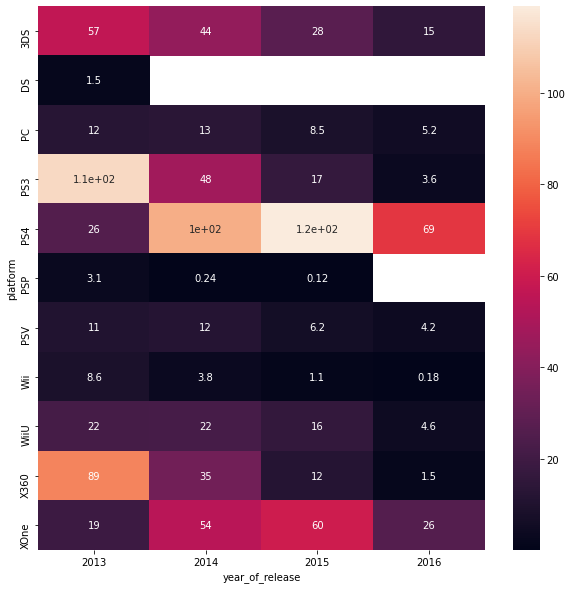

In [143]:
data_platform_year=data_3.pivot_table(index='platform',columns='year_of_release',values='sum',aggfunc='sum')
display(data_platform_year)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data_platform_year,annot = True) 
plt.show()

Теперь построим ящик с усами по глобальным продажам игр в разбивке по платформам. Видно большие выбросы у ряда платформ. Возможно что это выпускались на этих платформах популярные игры (бестселлеры)

,platform,sum
4,PS4,314.14
3,PS3,181.43
10,XOne,159.32
0,3DS,143.25
9,X360,136.80
8,WiiU,64.63
2,PC,39.43
6,PSV,32.99
7,Wii,13.66
5,PSP,3.50


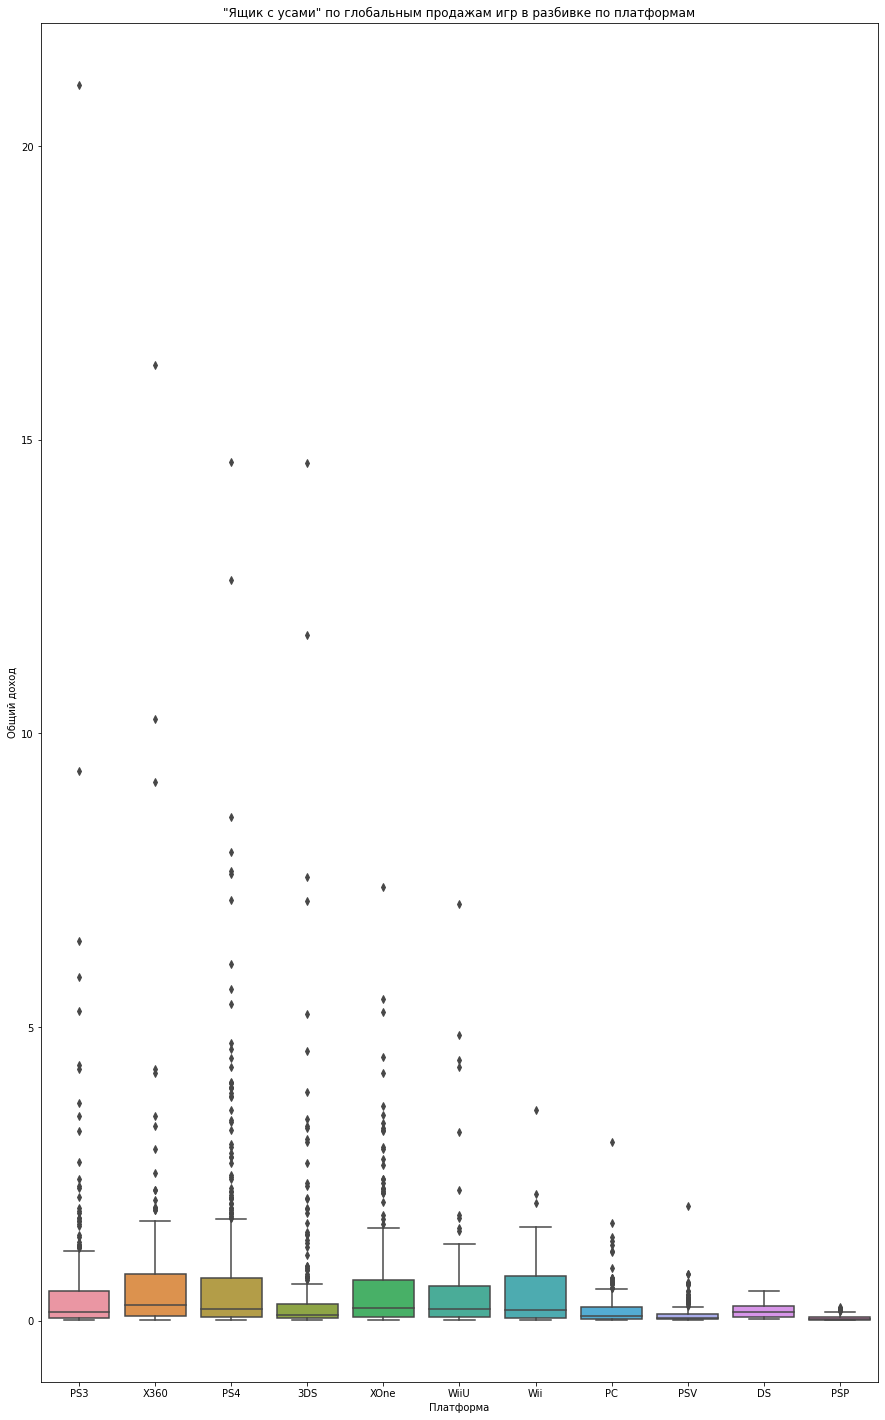

In [144]:
data_platform=data_3.pivot_table(index='platform',values='sum',aggfunc='sum')
data_platform=data_platform.reset_index(drop=False)
display(data_platform.sort_values(by='sum',ascending=False))
fig, ax = plt.subplots(figsize=(15, 25))
sns.boxplot(x='platform',y='sum',data=data_3)
plt.title('"Ящик с усами" по глобальным продажам игр в разбивке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Общий доход')
plt.show()

,platform,sum
4,PS4,314.14
3,PS3,181.43
10,XOne,159.32
0,3DS,143.25
9,X360,136.80
8,WiiU,64.63
2,PC,39.43
6,PSV,32.99
7,Wii,13.66
5,PSP,3.50


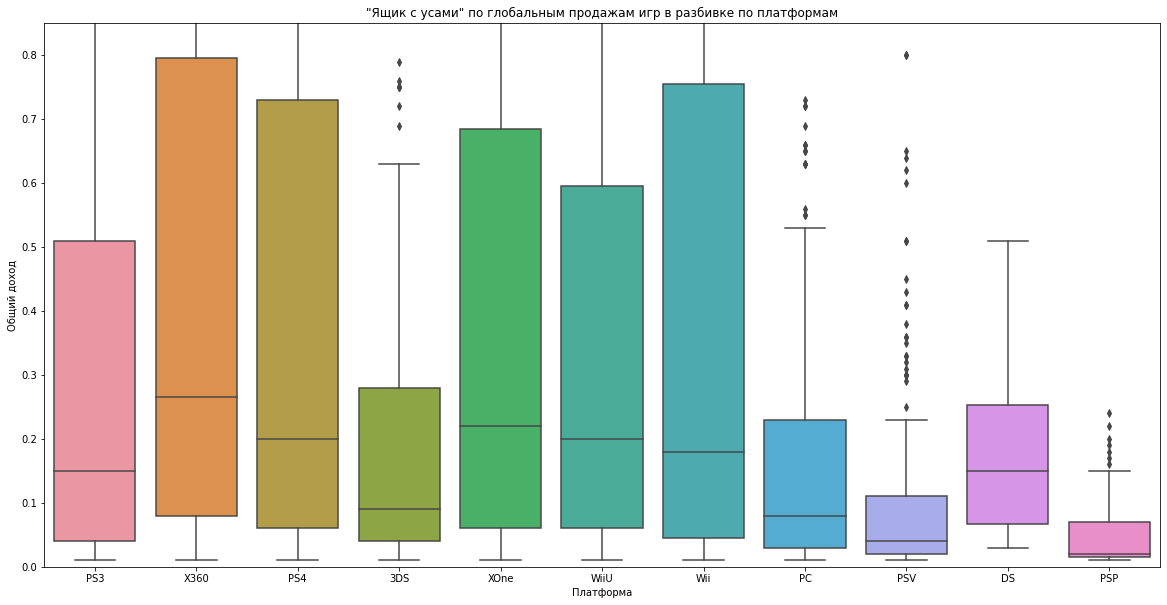

In [145]:
data_platform=data_3.pivot_table(index='platform',values='sum',aggfunc='sum')
data_platform=data_platform.reset_index(drop=False)
display(data_platform.sort_values(by='sum',ascending=False))
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(x='platform',y='sum',data=data_3)
plt.title('"Ящик с усами" по глобальным продажам игр в разбивке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Общий доход')

plt.ylim(0, 0.85)

plt.show()

Посмотрим, как влияют на продажи отзывы пользователей и критиков, на одной самой популярной платформе.

In [146]:
data_ps4=data_3[data_3['platform']=='PS4']
data_ps4=data_ps4.drop(['name','platform','year_of_release','genre','rating'], axis=1)
display(data_ps4)

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum
31,6.03,5.86,0.36,2.38,NaN,NaN,14.63
42,3.96,6.31,0.38,1.97,97.0,8.3,12.62
77,1.12,6.12,0.06,1.28,82.0,4.3,8.58
87,2.99,3.49,0.22,1.28,NaN,NaN,7.98
92,2.81,3.48,0.14,1.23,83.0,5.7,7.66
...,...,...,...,...,...,...,...
16500,0.00,0.00,0.01,0.00,69.0,7.5,0.01
16503,0.00,0.00,0.01,0.00,NaN,NaN,0.01
16526,0.01,0.00,0.00,0.00,61.0,7.9,0.01
16530,0.01,0.00,0.00,0.00,51.0,5.5,0.01


Для начала построим диаграммы рассеивания для зависимости общей суммы продаж, а так же суммы продаж по регионам от оценки критиков.
Видно что эта зависимость достаточно сильная для всех регионов, чем выше оценка критиков, тем выше сумма продаж. Некоторое нарушение зависимости можно отметить в Японии.Тут заметны некоторые выбросы(высокие продажи три низких оценках критиков)

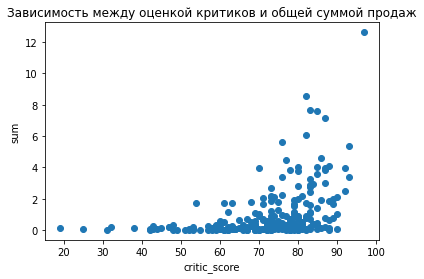

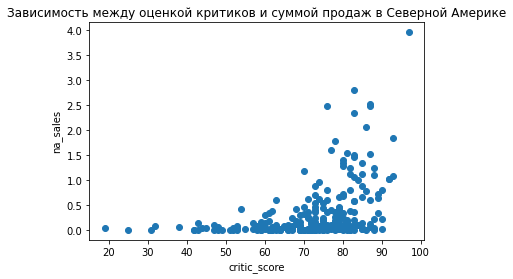

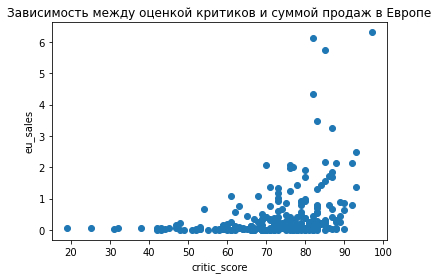

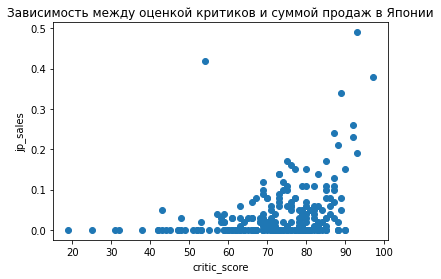

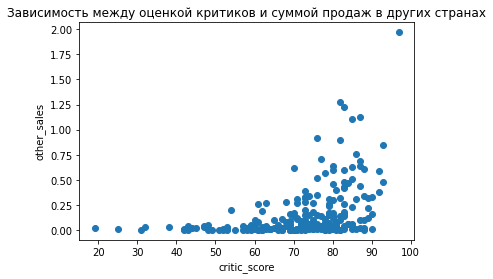

In [147]:
plt.scatter(x=data_ps4['critic_score'], y=data_ps4['sum'])
plt.title('Зависимость между оценкой критиков и общей суммой продаж')
plt.xlabel('critic_score')
plt.ylabel('sum')
plt.show()
plt.scatter(x=data_ps4['critic_score'], y=data_ps4['na_sales'])
plt.title('Зависимость между оценкой критиков и суммой продаж в Северной Америке')
plt.xlabel('critic_score')
plt.ylabel('na_sales')
plt.show()
plt.scatter(x=data_ps4['critic_score'], y=data_ps4['eu_sales'])
plt.title('Зависимость между оценкой критиков и суммой продаж в Европе')
plt.xlabel('critic_score')
plt.ylabel('eu_sales')
plt.show()
plt.scatter(x=data_ps4['critic_score'], y=data_ps4['jp_sales'])
plt.title('Зависимость между оценкой критиков и суммой продаж в Японии')
plt.xlabel('critic_score')
plt.ylabel('jp_sales')
plt.show()
plt.scatter(x=data_ps4['critic_score'], y=data_ps4['other_sales'])
plt.title('Зависимость между оценкой критиков и суммой продаж в других странах')
plt.xlabel('critic_score')
plt.ylabel('other_sales')
plt.show()

Теперь посмотрим на зависимость продаж от оценки пользователей. Тут наблюдается меньшая зависимость и больше выбросов, как для отдельных регионов так и для общих продаж. Можно предположить что это связано и с тем, что пользователи сначала преобретают игру, а затем пишут отзыв. К тому же бывают сильно ожидаемые игры на которые делаются предзаказы, но в дальнейшем такие игры могут получить не самые высокии оценки пользователей.

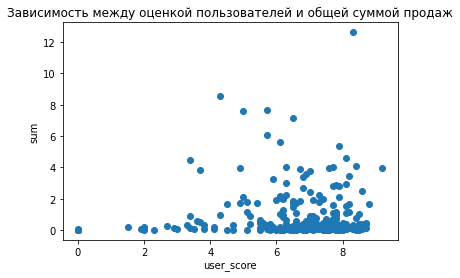

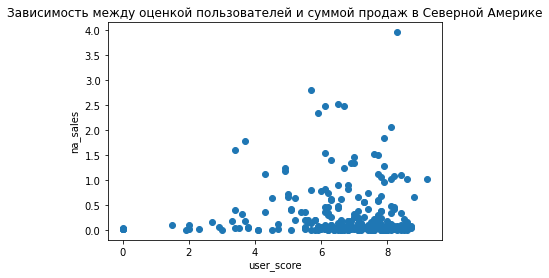

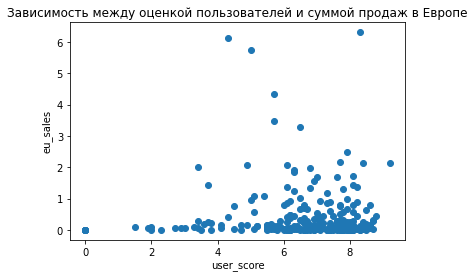

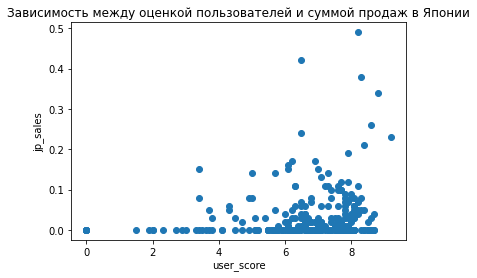

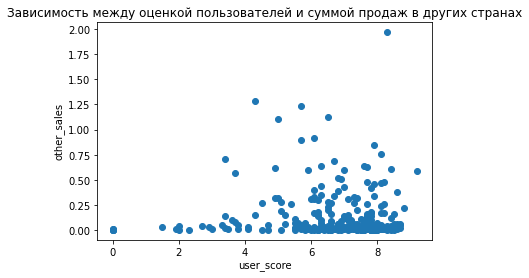

In [148]:
plt.scatter(x=data_ps4['user_score'], y=data_ps4['sum'])
plt.title('Зависимость между оценкой пользователей и общей суммой продаж')
plt.xlabel('user_score')
plt.ylabel('sum')
plt.show()
plt.scatter(x=data_ps4['user_score'], y=data_ps4['na_sales'])
plt.title('Зависимость между оценкой пользователей и суммой продаж в Северной Америке')
plt.xlabel('user_score')
plt.ylabel('na_sales')
plt.show()
plt.scatter(x=data_ps4['user_score'], y=data_ps4['eu_sales'])
plt.title('Зависимость между оценкой пользователей и суммой продаж в Европе')
plt.xlabel('user_score')
plt.ylabel('eu_sales')
plt.show()
plt.scatter(x=data_ps4['user_score'], y=data_ps4['jp_sales'])
plt.title('Зависимость между оценкой пользователей и суммой продаж в Японии')
plt.xlabel('user_score')
plt.ylabel('jp_sales')
plt.show()
plt.scatter(x=data_ps4['user_score'], y=data_ps4['other_sales'])
plt.title('Зависимость между оценкой пользователей и суммой продаж в других странах')
plt.xlabel('user_score')
plt.ylabel('other_sales')
plt.show()

А теперь посмотрим на корреляцию между оценками критиков, пользователей и суммами продаж.
Так же заметно корреляция между оценкой критиков и продажами в Японии в меньшей степени чем в других регионах. 
Оценка пользователей имеет же совсем низкий коэффициент кореляции с общими продажами и продажами по регионам. зато заметка корреляция между оценкой критиков и оценкой пользователей.

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum
na_sales,1.000000,0.785362,0.472981,0.944259,0.415008,0.030639,0.928160
eu_sales,0.785362,1.000000,0.464563,0.944698,0.346720,0.003444,0.958157
jp_sales,0.472981,0.464563,1.000000,0.496467,0.322358,0.187039,0.527129
other_sales,0.944259,0.944698,0.496467,1.000000,0.409191,0.020080,0.998051
critic_score,0.415008,0.346720,0.322358,0.409191,1.000000,0.520752,0.406568
user_score,0.030639,0.003444,0.187039,0.020080,0.520752,1.000000,0.023279
sum,0.928160,0.958157,0.527129,0.998051,0.406568,0.023279,1.000000


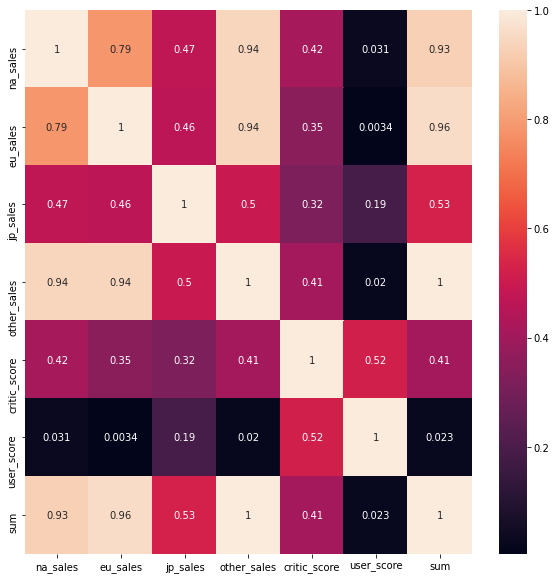

In [149]:
display(data_ps4.corr())
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data_ps4.corr(),annot = True)
plt.show()

Взглянем на корреляцию данных показателей для платформы XOne и PS3.

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum
na_sales,1.000000,0.874896,0.439867,0.932098,0.335205,0.099422,0.954921
eu_sales,0.874896,1.000000,0.443809,0.975743,0.309561,0.071753,0.974740
jp_sales,0.439867,0.443809,1.000000,0.459609,0.302327,0.273586,0.516258
other_sales,0.932098,0.975743,0.459609,1.000000,0.315748,0.091986,0.989812
critic_score,0.335205,0.309561,0.302327,0.315748,1.000000,0.622122,0.334285
user_score,0.099422,0.071753,0.273586,0.091986,0.622122,1.000000,0.103427
sum,0.954921,0.974740,0.516258,0.989812,0.334285,0.103427,1.000000


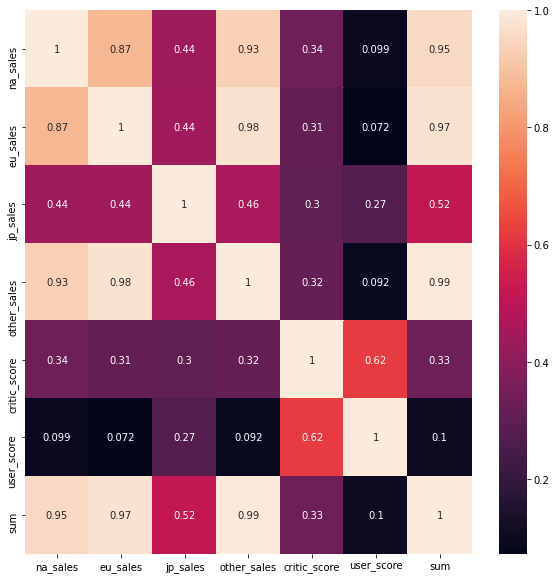

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum
na_sales,1.000000,0.765367,0.425725,0.988088,0.388636,0.068849,0.970433
eu_sales,0.765367,1.000000,0.421071,0.852986,0.379162,0.068502,0.898045
jp_sales,0.425725,0.421071,1.000000,0.441717,0.202954,0.096199,0.452701
other_sales,0.988088,0.852986,0.441717,1.000000,0.411825,0.073846,0.995238
critic_score,0.388636,0.379162,0.202954,0.411825,1.000000,0.465368,0.416998
user_score,0.068849,0.068502,0.096199,0.073846,0.465368,1.000000,0.074486
sum,0.970433,0.898045,0.452701,0.995238,0.416998,0.074486,1.000000


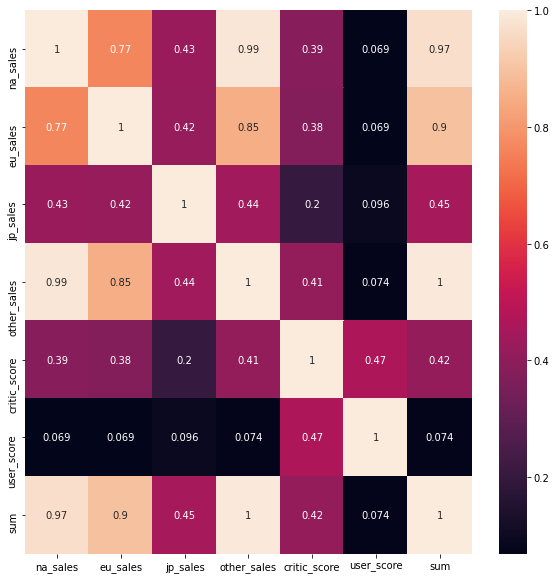

In [150]:
data_ps3=data_3[data_3['platform']=='PS3']
data_ps3=data_ps3.drop(['name','platform','year_of_release','genre','rating'], axis=1)
display(data_ps3.corr())
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data_ps3.corr(),annot = True)
plt.show()
data_xone=data_3[data_3['platform']=='XOne']
data_xone=data_xone.drop(['name','platform','year_of_release','genre','rating'], axis=1)
display(data_xone.corr())
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data_xone.corr(),annot = True)
plt.show()

С уверенностью можно сказать что корреляция между оценкой критиков и продажами выше чем корреляция между оценка пользователей и продажами. Так же есть регионы где корреляция оценки критиков как и оценки пользователей с продажами гораздо меньше чем в других, такой регион Япония. Так же стоит отметить что продажи в Японии ниже чем в других регионах.

Посмотрим на распределение по жанрам. Самый популярный жанр в котором выпускается больше всего игр Action 766, доход составил 321.87. При этом самым прибыльным жанром можно назвать Shooter, в этом жанре выпущено 187 игры, но доходы ссоставил 232.98.

Плохие показатели у игр в жанре Adventure, при выпуске 245 игр доход составил 23.64. Так же небольшие доходы наблюдаются в жанрах Strategy и Puzzle, 10.08 и 3.17 соответственно. Но этих игр и выпускается не много 56 и 17.

In [151]:
data_genre=data_3.pivot_table(index='genre',values='sum',aggfunc=('sum','count'))
data_genre=data_genre.reset_index(drop=False)
data_genre.sort_values('sum',ascending=False)

,genre,count,sum
0,Action,766,321.87
8,Shooter,187,232.98
10,Sports,214,150.65
7,Role-Playing,292,145.89
3,Misc,155,62.82
4,Platform,74,42.63
6,Racing,85,39.89
2,Fighting,80,35.31
1,Adventure,245,23.64
9,Simulation,62,21.76


## Составление портрета пользователя каждого региона

Для начала создадим сводные таблицы по каждому региону, где будет указана платформа, рейтинг, жанр, сумма продаж в регионе и общая сумма продаж.

In [152]:
data_na=data_3.drop(['name','year_of_release','eu_sales','jp_sales','other_sales','critic_score','user_score'], axis=1)
display(data_na)
data_eu=data_3.drop(['name','year_of_release','na_sales','jp_sales','other_sales','critic_score','user_score'], axis=1)
display(data_eu)
data_jp=data_3.drop(['name','year_of_release','na_sales','eu_sales','other_sales','critic_score','user_score'], axis=1)
display(data_jp)
data_other=data_3.drop(['name','year_of_release','na_sales','eu_sales','jp_sales','critic_score','user_score'], axis=1)
display(data_other)

,platform,genre,na_sales,rating,sum
16,PS3,Action,7.02,M,21.05
23,X360,Action,9.66,M,16.27
31,PS4,Shooter,6.03,NaN,14.63
33,3DS,Role-Playing,5.28,NaN,14.60
42,PS4,Action,3.96,M,12.62
...,...,...,...,...,...
16703,PSV,Adventure,0.00,NaN,0.01
16707,PSV,Misc,0.00,NaN,0.01
16710,PS3,Action,0.00,NaN,0.01
16712,PSV,Adventure,0.00,NaN,0.01


,platform,genre,eu_sales,rating,sum
16,PS3,Action,9.09,M,21.05
23,X360,Action,5.14,M,16.27
31,PS4,Shooter,5.86,NaN,14.63
33,3DS,Role-Playing,4.19,NaN,14.60
42,PS4,Action,6.31,M,12.62
...,...,...,...,...,...
16703,PSV,Adventure,0.00,NaN,0.01
16707,PSV,Misc,0.00,NaN,0.01
16710,PS3,Action,0.00,NaN,0.01
16712,PSV,Adventure,0.00,NaN,0.01


,platform,genre,jp_sales,rating,sum
16,PS3,Action,0.98,M,21.05
23,X360,Action,0.06,M,16.27
31,PS4,Shooter,0.36,NaN,14.63
33,3DS,Role-Playing,4.35,NaN,14.60
42,PS4,Action,0.38,M,12.62
...,...,...,...,...,...
16703,PSV,Adventure,0.01,NaN,0.01
16707,PSV,Misc,0.01,NaN,0.01
16710,PS3,Action,0.01,NaN,0.01
16712,PSV,Adventure,0.01,NaN,0.01


,platform,genre,other_sales,rating,sum
16,PS3,Action,3.96,M,21.05
23,X360,Action,1.41,M,16.27
31,PS4,Shooter,2.38,NaN,14.63
33,3DS,Role-Playing,0.78,NaN,14.60
42,PS4,Action,1.97,M,12.62
...,...,...,...,...,...
16703,PSV,Adventure,0.00,NaN,0.01
16707,PSV,Misc,0.00,NaN,0.01
16710,PS3,Action,0.00,NaN,0.01
16712,PSV,Adventure,0.00,NaN,0.01


Посмотрим на самые популярные платформы в Америке. Лидером оказался PS4. Так же в пятерку входят XOne, X360, 3DS, PS3.

Если посмотреть на долю продаж в Америке от общих продаж. Тут лидером становится X360 с результатом 59,69 от общих продаж. 
А дальше на второе место выходит Wii, 48,02 от общих продаж. Дальше идут следующие результаты:

DS 37.01

PS3 34.99

PS4 34.61

Можно заметить что для этих 5 платформ значительная доля рынка находитмя в Америке. Для таких платформ как Wii, X360 эта доля более 50%.

In [153]:
data_na_platform=data_na.pivot_table(index='platform',values=['sum','na_sales'],aggfunc='sum')
data_na_platform=data_na_platform.reset_index(drop=False)
display(data_na.groupby(by='platform').sum().sort_values(by='na_sales',ascending=False))
data_na_platform=data_na_platform[(data_na_platform['platform']=='DS') | (data_na_platform['platform']=='PS3') | (data_na_platform['platform']=='Wii') | (data_na_platform['platform']=='X360') | (data_na_platform['platform']=='PS4')]
data_na_platform['share']=(data_na_platform['na_sales']*100)/data_na_platform['sum']
display(data_na_platform.sort_values(by='share',ascending=False))

,na_sales,sum
platform,,
PS4,108.74,314.14
XOne,93.12,159.32
X360,81.66,136.80
PS3,63.50,181.43
3DS,38.20,143.25
WiiU,29.21,64.63
PC,11.11,39.43
Wii,6.56,13.66
PSV,5.04,32.99


,platform,na_sales,sum,share
9,X360,81.66,136.80,59.692982
7,Wii,6.56,13.66,48.023426
1,DS,0.57,1.54,37.012987
3,PS3,63.50,181.43,34.999724
4,PS4,108.74,314.14,34.615140


 Приступим к популярным платформам Европы. Лидером стал PS4. В пятерке X360, XOne, PS3, 3DS. Сразу заметим что лидер тот же что и  в Америке. Пятерка лидеров выглядит так же как в Америке. Правда в Европе популярнее PS3.

Если посмотреть на долю продаж в Европе от общих продаж. Тут лидер PC с результатом 64,31 от общих продаж. А дальше на второе место выходит PS4, 44,91 от общих продаж. Дальше идут следующие результаты:

Wii 43.41

PS3 37.37

X360 31.08


Можно заметить что для РС на рынок Европы приходится больше половины от общей суммы продаж. И это не удивительно, ведь эта платформа не вошла в пятерку лидеров по доле продаж для другого большого региона, Америка.

In [154]:
data_eu_platform=data_eu.pivot_table(index='platform',values=['sum','eu_sales'],aggfunc='sum')
data_eu_platform=data_eu_platform.reset_index(drop=False)
display(data_eu.groupby(by='platform').sum().sort_values(by='eu_sales',ascending=False))
data_eu_platform=data_eu_platform[(data_eu_platform['platform']=='PS') | (data_eu_platform['platform']=='PS3') | (data_eu_platform['platform']=='Wii') | (data_eu_platform['platform']=='X360') | (data_eu_platform['platform']=='PS4') | (data_eu_platform['platform']=='PC')]
data_eu_platform['share']=(data_eu_platform['eu_sales']*100)/data_eu_platform['sum']
display(data_eu_platform.sort_values(by='share',ascending=False))

,eu_sales,sum
platform,,
PS4,141.09,314.14
PS3,67.81,181.43
XOne,51.59,159.32
X360,42.52,136.80
3DS,30.96,143.25
PC,25.36,39.43
WiiU,19.85,64.63
PSV,6.10,32.99
Wii,5.93,13.66


,platform,eu_sales,sum,share
2,PC,25.36,39.43,64.316510
4,PS4,141.09,314.14,44.913096
7,Wii,5.93,13.66,43.411420
3,PS3,67.81,181.43,37.375296
9,X360,42.52,136.80,31.081871


В Японии Лидером оказалась платформа 3DS. Так же в пятерке лидеров по Японии PS3, PSV, PS4, WiiU. Тут мы видим еще одну платформу обретшую популярность в Японии, но не попавшую в лидеры в других регионах, PSV.

Что касается доли продаж, то лидер PSP. - 94.00. Далее идут

3DS	47.33

PS3 12.86

Wii 0.36

DS 0

Заметим что для платформы PSP рынов Японии является ключевым. Так же на рынке Японии всего четыре основных продаваемых платформы PSP, 3DS, PS3, Wii.

In [155]:
data_jp_platform=data_jp.pivot_table(index='platform',values=['sum','jp_sales'],aggfunc='sum')
data_jp_platform=data_jp_platform.reset_index(drop=False)
display(data_jp.groupby(by='platform').sum().sort_values(by='jp_sales',ascending=False))
data_jp_platform=data_jp_platform[(data_jp_platform['platform']=='3DS') | (data_jp_platform['platform']=='DS') | (data_jp_platform['platform']=='Wii') | (data_jp_platform['platform']=='PS3') | (data_jp_platform['platform']=='PSP')]
data_jp_platform['share']=(data_jp_platform['jp_sales']*100)/data_jp_platform['sum']
display(data_jp_platform.sort_values(by='share',ascending=False))

,jp_sales,sum
platform,,
3DS,67.81,143.25
PS3,23.35,181.43
PSV,18.59,32.99
PS4,15.96,314.14
WiiU,10.88,64.63
PSP,3.29,3.50
X360,0.51,136.80
XOne,0.34,159.32
Wii,0.05,13.66


,platform,jp_sales,sum,share
5,PSP,3.29,3.50,94.000000
0,3DS,67.81,143.25,47.336824
3,PS3,23.35,181.43,12.869977
7,Wii,0.05,13.66,0.366032
1,DS,0.00,1.54,0.000000


Пятерка лидеров других регионов такова: PS4, PS3, XOne, X360, DS3 

Доля на общем рынке выглядит так:

PS4	 15.39

PS3	14.75 

X360 8.85

Wii	8.19

In [156]:
data_other_platform=data_other.pivot_table(index='platform',values=['sum','other_sales'],aggfunc='sum')
data_other_platform=data_other_platform.reset_index(drop=False)
display(data_other.groupby(by='platform').sum().sort_values(by='other_sales',ascending=False))
data_other_platform=data_other_platform[(data_other_platform['platform']=='PS3') | (data_other_platform['platform']=='X360') | (data_other_platform['platform']=='Wii') | (data_other_platform['platform']=='PS4') | (data_other_platform['platform']=='PS2')]
data_other_platform['share']=(data_other_platform['other_sales']*100)/data_other_platform['sum']
display(data_other_platform.sort_values(by='share',ascending=False))

,other_sales,sum
platform,,
PS4,48.35,314.14
PS3,26.77,181.43
XOne,14.27,159.32
X360,12.11,136.80
3DS,6.28,143.25
WiiU,4.69,64.63
PSV,3.26,32.99
PC,2.96,39.43
Wii,1.12,13.66


,platform,other_sales,sum,share
4,PS4,48.35,314.14,15.391227
3,PS3,26.77,181.43,14.755002
9,X360,12.11,136.80,8.852339
7,Wii,1.12,13.66,8.199122


Рейтинг пяти самых популярных жанров в Америке и других регионах выглядит одинаково: Action, Shooter, Sports, Role-Playing, Misc. Для Европы отличается лишь пятая последняя строка. Там находятся игры жанра Racing.

Иначе выглядит пятерка по Японии: Role-Playing, Action, Misc, Fighting, Shooter. Вместо Sports появились Fighting. А жанр Role-Playing лидирует.

In [157]:
data_na_genre=data_na.pivot_table(index='genre',values=['na_sales'],aggfunc='sum')
data_na_genre=data_na_genre.reset_index(drop=False)
display(data_na_genre.sort_values(by='na_sales',ascending=False).head(5))
data_eu_genre=data_eu.pivot_table(index='genre',values=['eu_sales'],aggfunc='sum')
data_eu_genre=data_eu_genre.reset_index(drop=False)
display(data_eu_genre.sort_values(by='eu_sales',ascending=False).head(5))
data_jp_genre=data_jp.pivot_table(index='genre',values=['jp_sales'],aggfunc='sum')
data_jp_genre=data_jp_genre.reset_index(drop=False)
display(data_jp_genre.sort_values(by='jp_sales',ascending=False).head(5))
data_other_genre=data_other.pivot_table(index='genre',values=['other_sales'],aggfunc='sum')
data_other_genre=data_other_genre.reset_index(drop=False)
display(data_other_genre.sort_values(by='other_sales',ascending=False).head(5))

,genre,na_sales
0,Action,126.05
8,Shooter,109.74
10,Sports,65.27
7,Role-Playing,46.40
3,Misc,27.49


,genre,eu_sales
0,Action,118.13
8,Shooter,87.86
10,Sports,60.52
7,Role-Playing,36.97
6,Racing,20.19


,genre,jp_sales
7,Role-Playing,51.04
0,Action,40.49
3,Misc,9.20
2,Fighting,7.65
8,Shooter,6.61


,genre,other_sales
0,Action,37.20
8,Shooter,28.77
10,Sports,19.45
7,Role-Playing,11.48
3,Misc,6.09


<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

В этих 2х подразделах всё отлично! Предпочтения геймеров 3х регионов в отношении игровых платформ и жанров определены. Ну и выводы соответственно описывают эти отличия.</div>

Значения рейтингов:

EC	Для детей младшего возраста. Подходит для детей от 3 лет.

E	Подходит для всех возрастных категорий. 

E 10+	Подходит для лиц старше 10 лет. 

T	Подходит для лиц старше 13 лет. 

M	Подходит для лиц старше 17 лет. 

AO	Подходит для взрослых старше 18 лет. 

RP	Категория ещё не присвоена. Играм с категорией RP еще не присвоен окончательный рейтинг ESRB.

Прежде чем начать изучать рейтинги вспомним о пропускаж. Так как эти значения будут важны, заменим пропуски на BR(это и будет значить без рейтинга)

Посмотрим что происходит с рейтингами игр и влиянием рейтирнга на продажи. В Америке, Европе и других регионах наибольшей популярностью пользуются нигры рейтинга М(для лиц старше 17 лет). В Японии лидируют игры без рейтинга. Можно предположить что это связано с тем, что в Японии имеют популярность игры отличные от Америки, а данный рейтинг все же имеет популярность именно в регионе Америки. Возможно популярным играм Японии просто не присваевается рейтинг распространенный в Америке.

In [160]:
data_na['rating'] = data_na['rating']. fillna('BR')
data_eu['rating'] = data_eu['rating']. fillna('BR')
data_jp['rating'] = data_jp['rating']. fillna('BR')
data_other['rating'] = data_other['rating']. fillna('BR')
data_other['rating'].value_counts(dropna=False)
data_na_rating=data_na.pivot_table(index='rating',values=['na_sales'],aggfunc='sum')
data_na_rating=data_na_rating.reset_index(drop=False)
display(data_na_rating.sort_values(by='na_sales',ascending=False))
data_eu_rating=data_eu.pivot_table(index='rating',values=['eu_sales'],aggfunc='sum')
data_eu_rating=data_eu_rating.reset_index(drop=False)
display(data_eu_rating.sort_values(by='eu_sales',ascending=False))
data_jp_rating=data_jp.pivot_table(index='rating',values=['jp_sales'],aggfunc='sum')
data_jp_rating=data_jp_rating.reset_index(drop=False)
display(data_jp_rating.sort_values(by='jp_sales',ascending=False))
data_other_rating=data_other.pivot_table(index='rating',values=['other_sales'],aggfunc='sum')
data_other_rating=data_other_rating.reset_index(drop=False)
display(data_other_rating.sort_values(by='other_sales',ascending=False))

,rating,na_sales
3,M,165.21
0,BR,89.42
1,E,79.05
2,E10+,54.24
4,T,49.79


,rating,eu_sales
3,M,145.32
1,E,83.36
0,BR,78.91
2,E10+,42.69
4,T,41.95


,rating,jp_sales
0,BR,85.05
4,T,20.59
1,E,15.14
3,M,14.11
2,E10+,5.89


,rating,other_sales
3,M,47.04
0,BR,23.46
1,E,22.61
4,T,14.29
2,E10+,12.57


Вывод: попродуем описать краткий портрет пользователя каждого региона.

Америка: Это пользователь играющий на платформе ХOne или PS4 в игры жанра Action, Shooter, Sports рейтинга М или без рейтинга.

Европа: Это пользователь играющий на платформе PS4 или PS3 в игры жанра Action, Shooter, Sports рейтинга М,Е.

Япония: Это пользователь играющий на платформе 3DS или PS3 в игры жанра Role-Playing,Action, Misc без рейтинга или рейтинга Т.

Другие регионы: Это пользователь играющий на платформе PS4 или PS3 в игры жанра Action, Shooter, Sports рейтинга М или без рейтинга.

 ## Проверка гипотез
 
 Для проверки обеих гипотез мы использует t-тест, метод scipy.stats.ttest_ind с параметром equal_var=False, так как размеры выборок у нас различны.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One равен средним пользовательским рейтингам платформы PC.

Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One не равен средним пользовательским рейтингам платформы PC.

Подготовим данные. Создадим для каждой платформы таблицу с оценками пользователей. Так как нас интересуют только оценки пользователей, избавимся от пропусков.

In [32]:
data_xone=data_3[data_3['platform']=='XOne']
data_xone=data_xone[['platform','user_score']].copy()
data_xone=data_xone.dropna()
display(data_xone)
data_pc=data_3[data_3['platform']=='PC']
data_pc=data_pc[['platform','user_score']].copy()
data_pc=data_pc.dropna()
display(data_pc)
display(data_xone['user_score'].sum()/data_xone['user_score'].count())
display(data_pc['user_score'].sum()/data_pc['user_score'].count())

,platform,user_score
165,XOne,7.9
179,XOne,5.4
242,XOne,6.4
270,XOne,6.2
373,XOne,4.1
...,...,...
16597,XOne,6.0
16630,XOne,8.2
16643,XOne,6.6
16660,XOne,6.7


,platform,user_score
458,PC,3.9
1095,PC,7.9
1351,PC,2.2
1437,PC,6.0
1530,PC,5.4
...,...,...
16456,PC,8.3
16463,PC,6.8
16509,PC,7.9
16518,PC,1.4


6.149740932642487

6.0737499999999995

Проверим данные с оценками на выбросы. По графикам видно что оценки пользователей обеих платформ находятся в допустимых пределах (оценка может быть от 0 до 10).

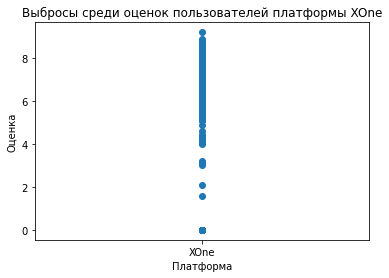

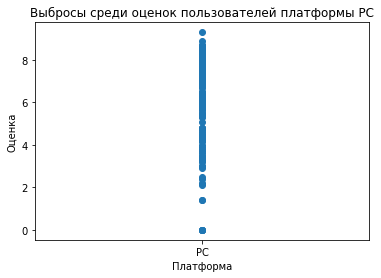

In [33]:
plt.scatter(x=data_xone['platform'], y=data_xone['user_score'])
plt.title('Выбросы среди оценок пользователей платформы XOne')
plt.xlabel('Платформа')
plt.ylabel('Оценка')
plt.show()
plt.scatter(x=data_pc['platform'], y=data_pc['user_score'])
plt.title('Выбросы среди оценок пользователей платформы PC')
plt.xlabel('Платформа')
plt.ylabel('Оценка')
plt.show()

Проверим гипотезу. По результатам проверки мы  не смогли отвергнуть нулевую гипотезу. Получается что средняя оценка пользователей платформы XOne равна средней оценке пользователей платформы PC.

In [34]:
results =st.ttest_ind(data_xone['user_score'], data_pc['user_score'],equal_var=False)

alpha=0.5 
print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.7263951389486794
Не получилось отвергнуть нулевую гипотезу


### Средние пользовательские рейтинги жанров Action и Sports разные

Нулевая гипотеза: средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports.

Альтернативная гипотеза: средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу пжанра Sports.

Подготовим данные. Создадим для каждог жанра таблицу с оценками пользователей. Так как нас интересуют только оценки пользователей, избавимся от пропусков.

In [35]:
data_action=data_3[data_3['genre']=='Action']
data_action=data_action[['genre','user_score']].copy()
data_action=data_action.dropna()
display(data_action)
data_sports=data_3[data_3['genre']=='Sports']
data_sports=data_sports[['genre','user_score']].copy()
data_sports=data_sports.dropna()
display(data_sports)
display(data_action['user_score'].sum()/data_action['user_score'].count())
display(data_sports['user_score'].sum()/data_sports['user_score'].count())

,genre,user_score
16,Action,8.2
23,Action,8.1
42,Action,8.3
149,Action,9.1
165,Action,7.9
...,...,...
16652,Action,8.5
16654,Action,5.1
16660,Action,6.7
16672,Action,0.0


,genre,user_score
77,Sports,4.3
94,Sports,5.0
126,Sports,4.3
143,Sports,5.7
264,Sports,4.5
...,...,...
16146,Sports,6.9
16450,Sports,4.5
16518,Sports,1.4
16638,Sports,0.0


6.156944444444445

4.844508670520231

Проверим данные с оценками на выбросы. По графикам видно что оценки пользователей обоих жанров находятся в допустимых пределах (оценка может быть от 0 до 10).

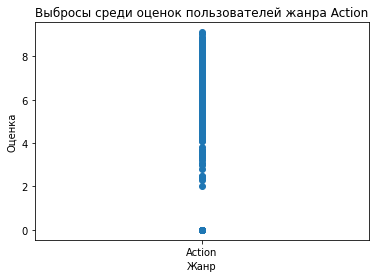

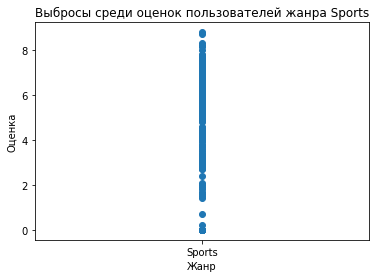

In [36]:
plt.scatter(x=data_action['genre'], y=data_action['user_score'])
plt.title('Выбросы среди оценок пользователей жанра Action')
plt.xlabel('Жанр')
plt.ylabel('Оценка')
plt.show()
plt.scatter(x=data_sports['genre'], y=data_sports['user_score'])
plt.title('Выбросы среди оценок пользователей жанра Sports')
plt.xlabel('Жанр')
plt.ylabel('Оценка')
plt.show()

Проверим гипотезу. По рузультатам проверки стоит отвергнуть нулевую гипотезу. Т.е. можно сказать что средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports.

In [37]:
results =st.ttest_ind(data_action['user_score'], data_sports['user_score'],equal_var=False)

alpha=0.5 
print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

3.947118399375673e-10
Отвергаем нулевую гипотезу


## Вывод:

Рассмотрим различия между регионами подробнее. Самыми популярными жанрами в Америке, Европе и других регионах оказались: Action, Shooter, Sports, Role-Playing, Misc. Тогда как в Японии этот список выглядит иначе: Role-Role-Playing, Action, Misc, Fighting, Shooter. Что касается самых популярных платформ, то тут различны все регионы. Тройка лидеров Америки: PS4, XOne, X360. Европа: PS4, PS3, Xone. Япония: 3DS, PS3, PSV. Другие регионы: PS4, PS3, Xone. Обратите внимание что рынок Японии вновь отличается больше других. Самые популярные рейтинги в Америке и других регионах М и игры без рейтинга. В Японии игры без рейтинга и ре

Портреты пользователей для разных регионов получились такими:

Америка: Это пользователь играющий на платформе ХOne или PS4 в игры жанра Action, Shooter, Sports рейтинга М или без рейтинга.

Европа: Это пользователь играющий на платформе PS4 или PS3 в игры жанра Action, Shooter, Sports рейтинга М,Е.

Япония: Это пользователь играющий на платформе 3DS или PS3 в игры жанра Role-Playing,Action, Misc без рейтинга или рейтинга Т.

Другие регионы: Это пользователь играющий на платформе PS4 или PS3 в игры жанра Action, Shooter, Sports рейтинга М или без рейтинга.

Что касается корреляции оценки критиков и продаж.Прямая зависимость не слишком высокая, но все же имеет место быть. При этом снова отличилась Япония. Эта зависимость в данном регионе намного ниже чем в прочих регионаж продажи.

Корреляция оценка пользователей же гораздо меньше, можно сказать совсем не значительно.

Так же нам удалось выяснить что средний цикл жизни платформы составляет около 4 лет. Сейчас самые перспективные платформы PS4 и XOne, они находятся в середине своего жизненного цикла.

Все полученные результаты стоит учесть при планировании продаж. Необходимо обратить внимание на популярные жанры игр в нашем регионе, на каких платформах чаще играют и какой рейтинг игр покупается чаще. В соответствии с этим стоит сделать выбор в пользу более активных продаж именно тех игр которые подходят под критерии.